<div align='center'>
    <h1>Exploratory Data Analysis on Used Ford Car</h1>
</div>
<div align='center'>
    <a href='https://sabbir-ahmed16.github.io/portfolio/'>Portfolio</a> | <a href='https://www.linkedin.com/in/sabbir-ahmed-cuet-ete/'>LinkedIn</a> | <a href='https://www.facebook.com/SabbirAhmed823'>Facebook</a>
</div>

<h3>Objectives</h3>

- To get familiar with data aggregation/grouping
- To get familiar with pivot table
- To perform basic data visualization

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('darkgrid')

#### Loading the dataset

In [2]:
df = pd.read_csv('ford.csv')
display(df.head())
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


Number of rows:  17964
Number of columns:  8


|Model | Name of the model|
---|:--|
Year|The year when that car was made|
Price|Price of the car|
Transmission|Transmission type|
Mileage|Number of miles travelled|
Fuel Type|Type of fuel that runs the car|
MPG|Miles per gallon|
Engine Size|Total volume of the cylinders in the engine|

In [3]:
# Checking the statistics of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB
None


**There is no missing value in any of the column and there are $3$ categorical columns**

In [4]:
df.describe()

,year,price,mileage,mpg,engineSize
count,17964.000000,17964.000000,17964.000000,17964.000000,17964.000000
mean,2016.864173,12280.078435,23361.880149,57.907832,1.350824
std,2.024987,4741.318119,19471.243292,10.125632,0.432383
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31052.000000,65.700000,1.500000
max,2020.000000,54995.000000,177644.000000,201.800000,5.000000


#### Observations:
- The oldest car is from the year $1996$ and the latest one is from $2020$.
- The cheapest car price is only $\$495$ and the most expensive car is $\$54995$. 
- The lowest mileage is only $1$ mile.
- The highest mpg is $201.8$.
- The engine size varies from $0$ to $5$L.

In [5]:
# Checking the unique ford car models
print(df['model'].unique())
print(len(df['model'].unique()))

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
23


<div class='alert alert-block alert-info' align='center'>
    <b>There are $23$ different car models in this dataset.</b>
</div>

In [6]:
# Checking the number of records of each model present in the dataset
df['model'].value_counts()

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Transit Tourneo             1
 Escort                      1
 Ranger                      1
Name: model, dtype: int64

#### Data Aggregation
- Displaying the average and total price of cars based on models, transmission and fuel type.

In [7]:
df_agg_price = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg_price)

,count,mean,sum
model,,,
B-MAX,355,8287.526761,2942072
C-MAX,543,9914.567219,5383610
EcoSport,1143,12499.268591,14286664
Edge,208,22810.500000,4744584
Escort,1,3000.000000,3000
Fiesta,6556,10196.862569,66850631
Focus,4588,13185.882956,60496831
Fusion,16,2555.812500,40893
Galaxy,228,17841.872807,4067947


#### Pivot Table
- Displaying the average and total mileage for each model using a pivot table

In [8]:
df_pivot_mileage = pd.pivot_table(df, index='model', values='mileage', aggfunc=['count', 'mean', 'sum'])

display(df_pivot_mileage)

,count,mean,sum
,mileage,mileage,mileage
model,,,
B-MAX,355,28131.735211,9986766
C-MAX,543,28456.979742,15452140
EcoSport,1143,16469.806649,18824989
Edge,208,21769.495192,4528055
Escort,1,50000.000000,50000
Fiesta,6556,21679.115619,142128282
Focus,4588,23735.274412,108897439
Fusion,16,65888.812500,1054221


#### Based on model, transmission and fuel type - 
- What are the top $5$ selling car models/transmission/fuel types in the dataset?
- What is the average selling price of the top $5$ selling car models/transmission/fuel type?
- What is the total sale of the top $5$ selling car models/transmission/fuel type?

In [9]:
# Function to show values on tip of bars in bar plot
def show_values(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() *  0.65
                value = '{:.2f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [10]:
def bar_plot(col_name):
    
    # Calculating the average and total price of cars
    df_agg = df.groupby(col_name)['price'].agg(['count', 'mean', 'sum'])
    
    # Sorting the dataframe based on 'count'
    df_agg = df_agg.sort_values(by='count', ascending=False)
    
    # Creating a new column 'percent_of_cars' representing the percentage of cars present in each category
    df_agg['percent_of_cars'] = (df_agg['count'] / df_agg['count'].sum()) * 100
    
    # Converting the 'sum' column representing price in $ to million $
    df_agg['sum'] = df_agg['sum'] / 1000000
    
    # Rounding the values of each column upto two decimal places
    df_agg = df_agg.round(2)
    
    # Removing the count column
    df_agg = df_agg.drop('count', axis=1)
    
    # Plotting figure
    plt.figure(figsize=(20, 8))
    
    # Percentage
    plt.subplot(1, 3, 1)
    ax = sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='#D35400')
    show_values(ax, 'h')
    plt.title('Percentage of cars in each ' + str(col_name))
    plt.xlabel("Number of cars (%)")
    plt.ylabel(col_name.capitalize())
    
    # Mean
    plt.subplot(1, 3, 2)
    ax = sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='#9B59B6')
    show_values(ax, 'h')
    plt.title('Average resale value of cars of each ' + str(col_name))
    plt.xlabel("Average price ($)")
    plt.ylabel("")
    
    # Total
    plt.subplot(1, 3, 3)
    ax = sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='#17A589')
    show_values(ax, 'h')
    plt.title('Total resale value of the cars by each ' + str(col_name))
    plt.xlabel("Total price (million $)")
    plt.ylabel("")
    show_values(ax, 'h', space=0.05)
    plt.tight_layout()
    plt.show()

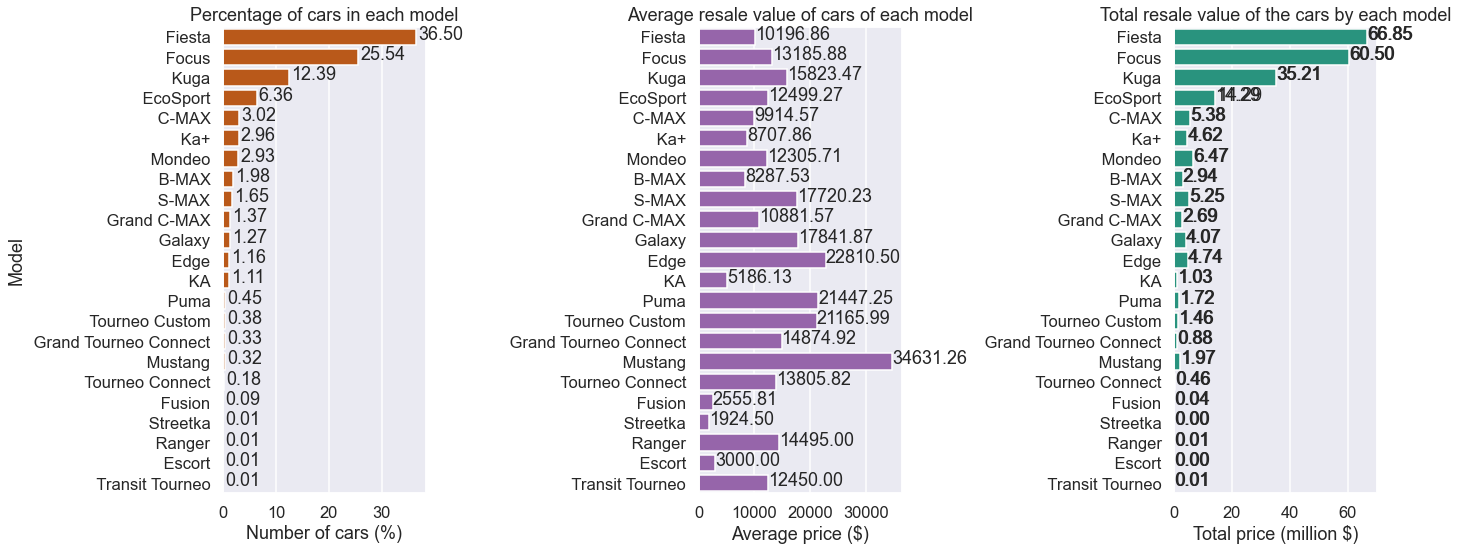

In [11]:
# Creating bar plot based on car models
bar_plot('model')

#### Observations
- The top 5 selling car models are Fiesta, Focus, Kuga, EcoSport and C-MAX respectively.
- The top 5 average selling car models are Mustang, Edge, Puma, Tourneo Custom and Galaxy.
- The top 5 total selling car models are Fiesta, Focus, Kuga, EcoSport and Mondeo.

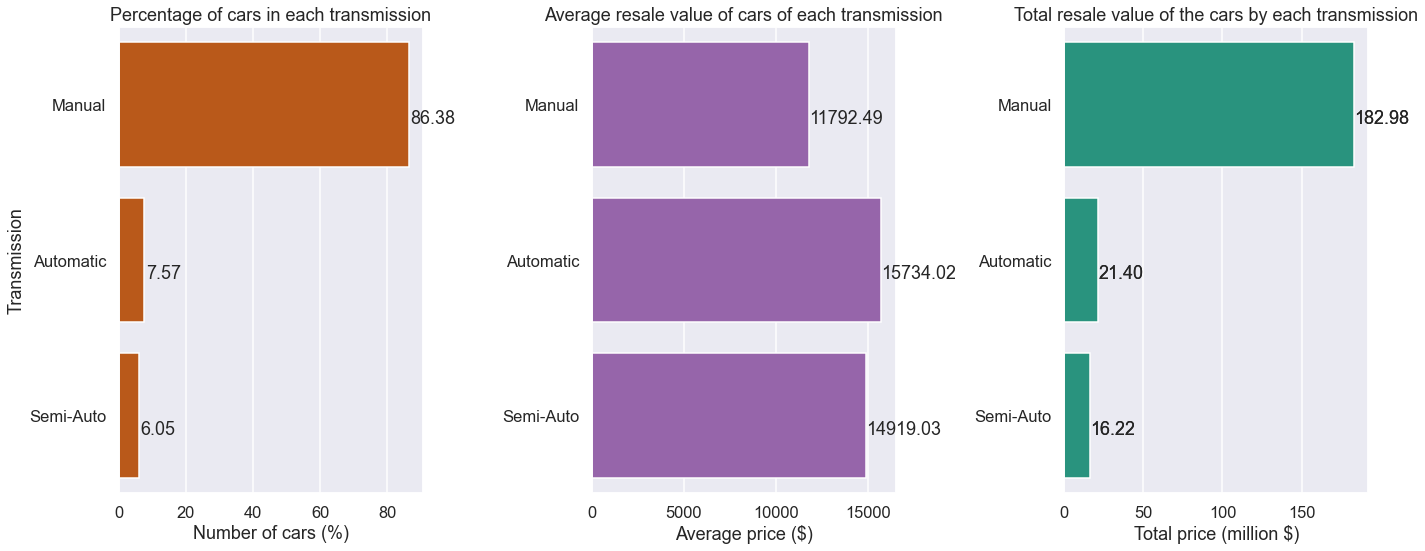

In [12]:
# Creating bar plot based on Transmission type
bar_plot('transmission')

#### Observations:
- There are $3$ different types of cars based on transmission.
- The highest number of cars are of manual type.
- The highest average resale value cars are of automatic type i.e. automatic cars are more expensive.
- The top total resale value cars are of manual type.

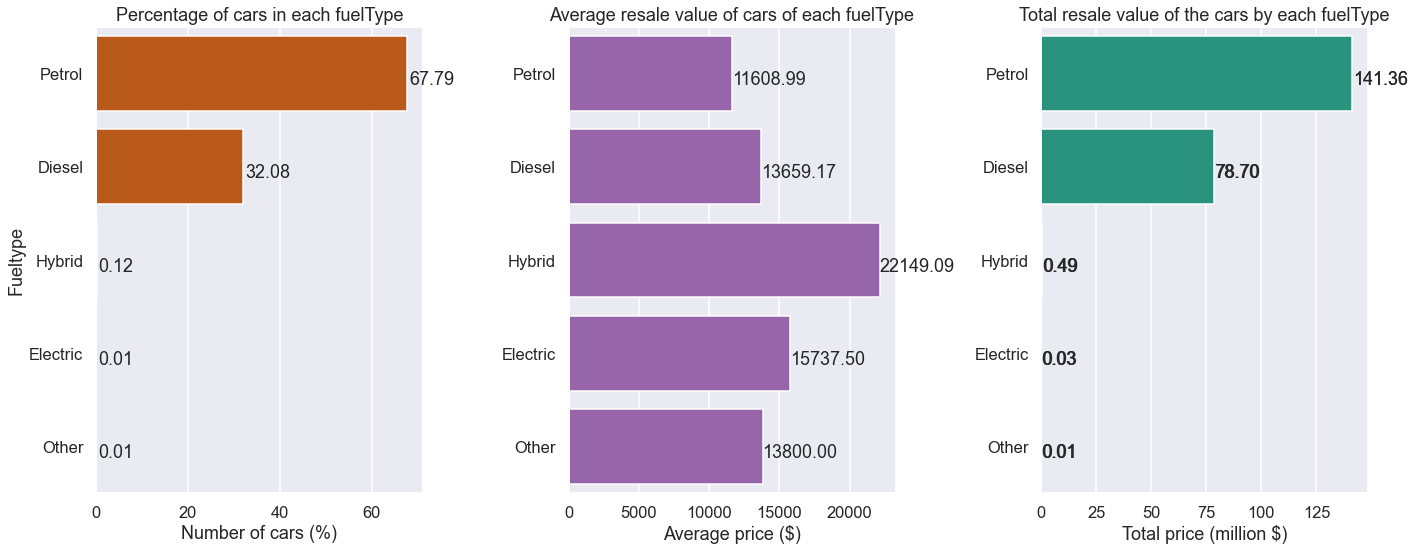

In [13]:
# Creating bar plot based on fuel type
bar_plot('fuelType')

#### Observations:
- Petrol is the most consumed fuel by Ford cars in this dataset.
- Average resale value of hybrid cars is the highest.
- Total resale value of petrol cars is the highest